# Convertendo EDF -> Parquet

In [1]:
from mne.io import read_raw_edf
import pandas as pd 

path_data = '/media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/'
path_info = '/home/davi/Documentos/doutorado_ppgee_v2/data/siena_infos.json'

infos = pd.read_json(path_info)


In [37]:

dfs = []

for index, row in infos.iterrows():
    path_ = f"{path_data}{row['name']}"
    raw = read_raw_edf(path_)
    df = raw.to_data_frame()
    df.columns = [col.replace(" ","_") for col in df.columns]
    df.to_parquet(f"{path_data}{row['name'].replace('edf','parquet')}")


Extracting EDF parameters from /media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [19]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

# conf = SparkConf().setMaster("local[*]").setAppName("Doutorado")
# conf.set("spark.executor.memory", "6G")
# conf.set("spark.driver.memory", "2G")
# conf.set("spark.executor.cores", "4")
# conf.set("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
# conf.set("spark.default.parallelism", "4")

# spark =  SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.appName('Doutorado').getOrCreate()



In [63]:
d = spark.read.parquet(f"{path_data}{'PN00-1.parquet'}")

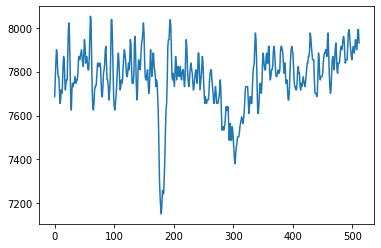

In [64]:
import matplotlib.pyplot as plt

plt.plot(d.select('EKG_EKG').limit(512).collect())


/media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf
Extracting EDF parameters from /media/davi/6A81-05CF/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<AxesSubplot:>

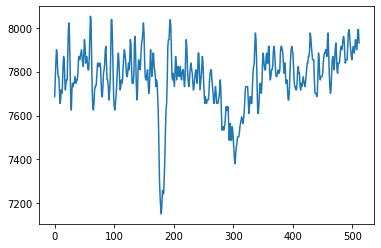

In [65]:
path_ = f"{path_data}PN00-1.edf"
print(path_)
raw = read_raw_edf(path_)
d1 = raw.to_data_frame()
d1.columns = [col.replace(" ","_") for col in d1.columns]
# df.to_parquet(f"{path_data}{row['name'].replace('edf','parquet')}")

d1['EKG_EKG'].iloc[:512].plot()

In [36]:
[col.replace(" ","_") for col in df.columns]

['time',
 'EEG_Fp1',
 'EEG_F3',
 'EEG_C3',
 'EEG_P3',
 'EEG_O1',
 'EEG_F7',
 'EEG_T3',
 'EEG_T5',
 'EEG_Fc1',
 'EEG_Fc5',
 'EEG_Cp1',
 'EEG_Cp5',
 'EEG_F9',
 'EEG_Fz',
 'EEG_Cz',
 'EEG_Pz',
 'EEG_Fp2',
 'EEG_F4',
 'EEG_C4',
 'EEG_P4',
 'EEG_O2',
 'EEG_F8',
 'EEG_T4',
 'EEG_T6',
 'EEG_Fc2',
 'EEG_Fc6',
 'EEG_Cp2',
 'EEG_Cp6',
 'EEG_F10',
 'EKG_EKG',
 'SPO2',
 'HR',
 '1',
 '2',
 'MK']

In [29]:
df_.dtypes

time       float64
EEG Fp1    float64
EEG F3     float64
EEG C3     float64
EEG P3     float64
EEG O1     float64
EEG F7     float64
EEG T3     float64
EEG T5     float64
EEG Fc1    float64
EEG Fc5    float64
EEG Cp1    float64
EEG Cp5    float64
EEG F9     float64
EEG Fz     float64
EEG Cz     float64
EEG Pz     float64
EEG Fp2    float64
EEG F4     float64
EEG C4     float64
EEG P4     float64
EEG O2     float64
EEG F8     float64
EEG T4     float64
EEG T6     float64
EEG Fc2    float64
EEG Fc6    float64
EEG Cp2    float64
EEG Cp6    float64
EEG F10    float64
EKG EKG    float64
SPO2       float64
HR         float64
1          float64
2          float64
MK         float64
dtype: object